In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X,maxs,rng 

In [3]:
def logistic_func(beta, X): 
    ''' 
    logistic(si+gmoid) function 
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))

In [4]:
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc

In [18]:
def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 

In [114]:

def grad_desc(X, y, beta, lr, num_of_iteration): 
    ''' 
    gradient descent function 
    '''
    cost_list=[]
    cost = cost_func(beta, X, y) 
      
    for i in range( num_of_iteration): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
     
        cost_list.append(cost)
      
    return beta,cost_list

In [7]:
def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

In [8]:
dataset = pd.read_csv('heart.csv')  
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dataset.shape

(303, 14)

In [10]:
X=dataset[['age','sex']]
Y=dataset.iloc[:,13].values

# Visualize the 2d feature space to make sure that they are linearly separable 

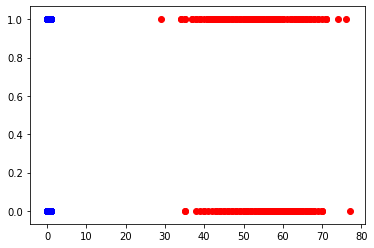

In [72]:
import matplotlib.pyplot as plt
plt.scatter(dataset["age"], dataset["target"], color="red")
plt.scatter(dataset["sex"], dataset["target"], color="blue")

In [12]:
X,maxs,rng = normalize(X)

In [13]:
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 

In [14]:
beta = np.matrix(np.zeros(X.shape[1]))

# Apply Logistc Regression to Age, Sex Colums 

Accuracy is :  66.33663366336634 



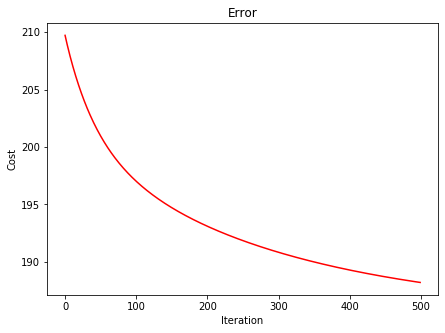

In [15]:
beta ,cost_list= grad_desc(X, Y, beta,0.001,500) 

y_pred = pred_values(beta, X) 
accuracy=np.mean(Y==y_pred)*100
print('Accuracy is : ',np.mean(Y==y_pred)*100,"\n")

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(np.arange(len(cost_list)),cost_list,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error')
plt.show()

# Try to increase the accuracy by using Different LR and Num of Iter and apply it into different 2 col randomly

In [69]:
rate=[0.001,0.01,0.0001,0.03,1,0.00001,0.1]
epochs=[500,1000,2000,3500,5000,10000]
List_Col_lr_epoch_acc=[]

for i in dataset.columns:
    
    for j in dataset.columns:
        
        if i!=j and i!='target' and j !='target':#TO Take two featuers not the same and also not the same of y 
            
            print("Columns --> [ ",i , "  , ", j," ] \n************")
            X=dataset[[i,j]]
            X,maxs,rng = normalize(X)
            X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
            
            for lr in rate: # for every learing rate wa apply different numbers of epochs 
                print("learning rate =",lr,"\n------------------------------")
                
                for epoch in epochs: # To check Accuracy with differnet epochs value
                    beta = np.matrix(np.zeros(X.shape[1]))
                    print("epoch =",epoch)
                    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

                    beta ,cost_list= grad_desc(X_train, y_train, beta,lr,epoch) 

                    y_pred = pred_values(beta, X_test) 
                    accuracy=np.mean(y_test==y_pred)*100

                    List_Col_lr_epoch_acc.append((i,j,lr,epoch,accuracy))

                  # print accuracy
                    print('Accuracy is : ',accuracy,"\n")
                print("______________________________\n")

Columns --> [  age   ,  sex  ] 
************
learning rate = 0.001 
------------------------------
epoch = 500
Accuracy is :  60.65573770491803 

epoch = 1000
Accuracy is :  59.01639344262295 

epoch = 2000
Accuracy is :  54.09836065573771 

epoch = 3500
Accuracy is :  54.09836065573771 

epoch = 5000
Accuracy is :  54.09836065573771 

epoch = 10000
Accuracy is :  54.09836065573771 

______________________________

learning rate = 0.01 
------------------------------
epoch = 500
Accuracy is :  54.09836065573771 

epoch = 1000
Accuracy is :  54.09836065573771 

epoch = 2000
Accuracy is :  54.09836065573771 

epoch = 3500
Accuracy is :  54.09836065573771 

epoch = 5000
Accuracy is :  54.09836065573771 

epoch = 10000
Accuracy is :  54.09836065573771 

______________________________

learning rate = 0.0001 
------------------------------
epoch = 500
Accuracy is :  59.01639344262295 

epoch = 1000
Accuracy is :  59.01639344262295 

epoch = 2000
Accuracy is :  62.295081967213115 

epoch = 3

C:\Users\Hager\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Accuracy is :  52.459016393442624 

epoch = 2000
Accuracy is :  52.459016393442624 

epoch = 3500
Accuracy is :  52.459016393442624 

epoch = 5000
Accuracy is :  52.459016393442624 

epoch = 10000
Accuracy is :  52.459016393442624 

______________________________

learning rate = 1e-05 
------------------------------
epoch = 500
Accuracy is :  50.81967213114754 

epoch = 1000
Accuracy is :  50.81967213114754 

epoch = 2000
Accuracy is :  50.81967213114754 

epoch = 3500
Accuracy is :  54.09836065573771 

epoch = 5000
Accuracy is :  59.01639344262295 

epoch = 10000
Accuracy is :  59.01639344262295 

______________________________

learning rate = 0.1 
------------------------------
epoch = 500
Accuracy is :  60.65573770491803 

epoch = 1000
Accuracy is :  60.65573770491803 

epoch = 2000
Accuracy is :  60.65573770491803 

epoch = 3500
Accuracy is :  60.65573770491803 

epoch = 5000
Accuracy is :  60.65573770491803 

epoch = 10000
Accuracy is :  60.65573770491803 

_____________________

# Get the max accuracy and get the 2 columns that are between them

In [84]:
max(List_Col_lr_epoch_acc, key=lambda tup:tup[4])

('trestbps', 'thal', 0.001, 500, 85.24590163934425)

In [71]:
max_value=max(List_Col_lr_epoch_acc, key=lambda tup:tup[4])

for  tup in List_Col_lr_epoch_acc:
    if tup[4]==max_value[4] :
        print(tup)
    

('trestbps', 'thal', 0.001, 500, 85.24590163934425)
('trestbps', 'thal', 0.001, 1000, 85.24590163934425)
('trestbps', 'thal', 0.0001, 5000, 85.24590163934425)
('trestbps', 'thal', 0.0001, 10000, 85.24590163934425)
('chol', 'thal', 0.001, 500, 85.24590163934425)
('chol', 'thal', 0.001, 1000, 85.24590163934425)
('chol', 'thal', 0.001, 2000, 85.24590163934425)
('chol', 'thal', 0.001, 3500, 85.24590163934425)
('chol', 'thal', 0.001, 5000, 85.24590163934425)
('chol', 'thal', 0.001, 10000, 85.24590163934425)
('chol', 'thal', 0.01, 500, 85.24590163934425)
('chol', 'thal', 0.01, 1000, 85.24590163934425)
('chol', 'thal', 0.01, 2000, 85.24590163934425)
('chol', 'thal', 0.01, 3500, 85.24590163934425)
('chol', 'thal', 0.01, 5000, 85.24590163934425)
('chol', 'thal', 0.01, 10000, 85.24590163934425)
('chol', 'thal', 0.0001, 3500, 85.24590163934425)
('chol', 'thal', 0.0001, 5000, 85.24590163934425)
('chol', 'thal', 0.0001, 10000, 85.24590163934425)
('chol', 'thal', 0.1, 500, 85.24590163934425)
('chol'

# Make sure that this 2 col are linearly separable 

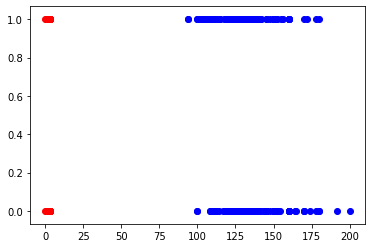

In [75]:
import matplotlib.pyplot as plt
plt.scatter(dataset["thal"], dataset["target"], color="red")
plt.scatter(dataset["trestbps"], dataset["target"], color="blue")

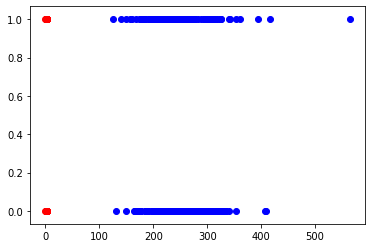

In [74]:
import matplotlib.pyplot as plt
plt.scatter(dataset["thal"], dataset["target"], color="red")
plt.scatter(dataset["chol"], dataset["target"], color="blue")

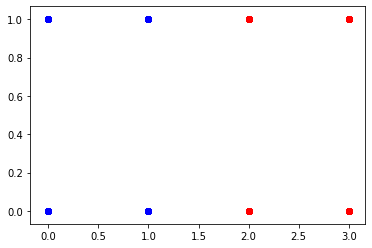

In [82]:
import matplotlib.pyplot as plt
plt.scatter(dataset["thal"], dataset["target"], color="red")
plt.scatter(dataset["fbs"], dataset["target"], color="blue")

# Apply Logistc Regression to This 2 Col

Accuracy is :  85.24590163934425 



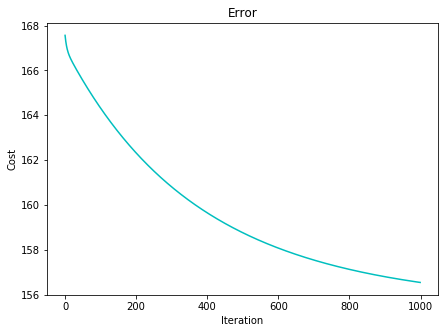

In [112]:
X=dataset[['trestbps','thal']]
Y=dataset.iloc[:,13].values

X,maxs,rng = normalize(X)
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
beta = np.matrix(np.zeros(X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
beta ,cost_list= grad_desc(X_train, y_train, beta,0.001,1000) 

y_pred = pred_values(beta, X_test) 
accuracy=np.mean(y_test==y_pred)*100
print('Accuracy is : ',accuracy,"\n")

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(np.arange(len(cost_list)),cost_list,'c')
#plt.xlim([-1,1100])
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error')
plt.show()

In [113]:
beta

matrix([[ 2.06826444, -0.85363398, -2.04106427]])

# Try to show when take combination of columns will affect on accurcy or not

Accuracy is :  83.60655737704919 



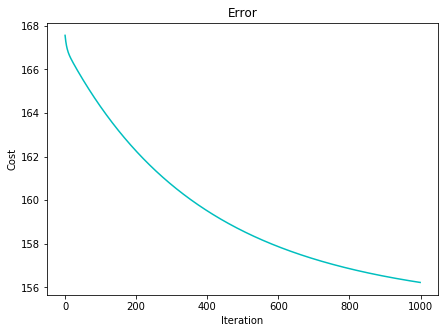

In [115]:
X=dataset[['trestbps','thal','fbs','chol']]
Y=dataset.iloc[:,13].values

X,maxs,rng = normalize(X)
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
beta = np.matrix(np.zeros(X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
beta ,cost_list= grad_desc(X_train, y_train, beta,0.001,1000) 

y_pred = pred_values(beta, X_test) 
accuracy=np.mean(y_test==y_pred)*100
print('Accuracy is : ',accuracy,"\n")

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(np.arange(len(cost_list)),cost_list,'c')

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error')
plt.show()

Accuracy is :  75.40983606557377 



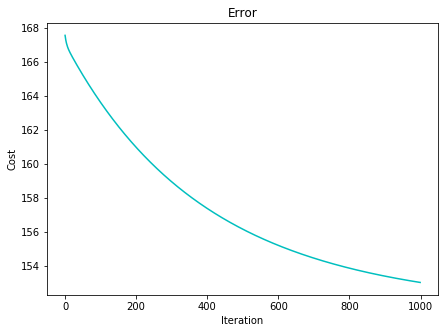

In [120]:
X=dataset[['thal','fbs','chol','age']]
Y=dataset.iloc[:,13].values

X,maxs,rng = normalize(X)
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
beta = np.matrix(np.zeros(X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
beta ,cost_list= grad_desc(X_train, y_train, beta,0.001,1000) 

y_pred = pred_values(beta, X_test) 
accuracy=np.mean(y_test==y_pred)*100
print('Accuracy is : ',accuracy,"\n")

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(np.arange(len(cost_list)),cost_list,'c')

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error')
plt.show()

Accuracy is :  77.04918032786885 



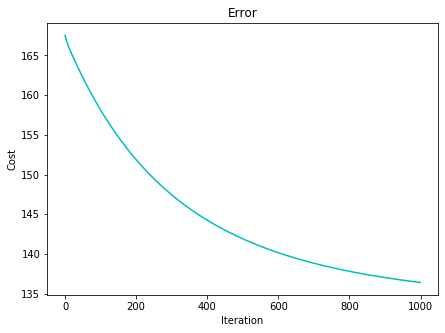

In [122]:
X=dataset[['thal','fbs','chol','age','oldpeak']]
Y=dataset.iloc[:,13].values

X,maxs,rng = normalize(X)
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
beta = np.matrix(np.zeros(X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
beta ,cost_list= grad_desc(X_train, y_train, beta,0.001,1000) 

y_pred = pred_values(beta, X_test) 
accuracy=np.mean(y_test==y_pred)*100
print('Accuracy is : ',accuracy,"\n")

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(np.arange(len(cost_list)),cost_list,'c')

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error')
plt.show()

Accuracy is :  75.40983606557377 



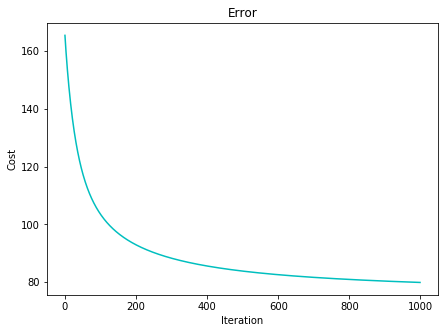

In [121]:
X=dataset.iloc[:,0:13].values
Y=dataset.iloc[:,13].values

X,maxs,rng = normalize(X)
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
beta = np.matrix(np.zeros(X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
beta ,cost_list= grad_desc(X_train, y_train, beta,0.001,1000) 

y_pred = pred_values(beta, X_test) 
accuracy=np.mean(y_test==y_pred)*100
print('Accuracy is : ',accuracy,"\n")

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(np.arange(len(cost_list)),cost_list,'c')

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error')
plt.show()